In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

In [3]:
task = mnist.MNIST()
task.load_all_data(device)

In [29]:
X = task.X_train[[0]].cpu()
# plt.imshow(X[0,0].numpy())
# plt.show()

def image2patches(X, n_patches, patch_size=None):
    bs, c, h, w = X.shape
    
    np1, np2 = n_patches
    if patch_size is None:
        ps1, ps2 = int(h/np1), int(w/np2)
    else:
        ps1, ps2 = patch_size
    result = torch.empty(bs, np1, np2, c, ps1, ps2, device=X.device, dtype=X.dtype)
    print(result.shape)
    print(np.linspace(0, h, np1+1))
    for x in np.linspace(0, h, np1):
        for p2 in range(np2):
            print(x)
#             print(p1, np1, h*p1/np1)
#             x, y = h*(p1/np1), w*(p2/np2)
#             xb, yb = x-ps1/2, y-ps2/2
#             xa, ya = x+ps1/2, y+ps2/2
#             print(xb, yb)
#             patch = X[:, :, int(xb):int(xa), int(yb): int(ya)]
#             print(patch.shape)
#             result[:, p1, p2, :, :, :] = patch
#     return result
    
    
image2patches(X, (4, 4), )

torch.Size([1, 4, 4, 1, 7, 7])
[ 0.  7. 14. 21. 28.]
0.0
0.0
0.0
0.0
9.333333333333334
9.333333333333334
9.333333333333334
9.333333333333334
18.666666666666668
18.666666666666668
18.666666666666668
18.666666666666668
28.0
28.0
28.0
28.0


In [2]:
with open('data/big.txt', 'r') as file:
    data = file.read()

In [3]:
c = 'a'
c >= 'a' and c<='z'

True

In [11]:
datap = [c for c in data.lower() if (c >= 'a' and c<='z' or c==' ')]
# print({a for a in datap})
''.join(datap)[:1000]

'the project gutenberg ebook of the adventures of sherlock holmesby sir arthur conan doyle in our series by sir arthur conan doylecopyright laws are changing all over the world be sure to check thecopyright laws for your country before downloading or redistributingthis or any other project gutenberg ebookthis header should be the first thing seen when viewing this projectgutenberg file  please do not remove it  do not change or edit theheader without written permissionplease read the legal small print and other information about theebook and project gutenberg at the bottom of this file  included isimportant information about your specific rights and restrictions inhow the file may be used  you can also find out about how to make adonation to project gutenberg and how to get involvedwelcome to the world of free plain vanilla electronic textsebooks readable by both humans and by computers since these ebooks were prepared by thousands of volunteerstitle the adventures of sherlock holmesau

In [32]:
decoder_layer = nn.TransformerDecoderLayer(d_model=26, nhead=2, dim_feedforward=100)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)


print(np.sum([p.numel() for p in decoder_layer.parameters()]))
print(np.sum([p.numel() for p in transformer_decoder.parameters()]))

11098
66588


In [39]:
q, k, v = torch.randn(3, 9, 50, 26)
out, out_weights = list(decoder_layer.modules())[1](q, k, v)
out.shape, out_weights.shape

(torch.Size([9, 50, 26]), torch.Size([50, 9, 9]))

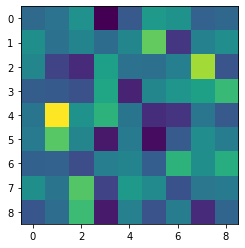

In [41]:
plt.imshow(out_weights.detach().numpy()[0])

In [51]:
from einops import rearrange, reduce, repeat

In [ ]:
def upsample_images(X, hw):
    b, c, h, w = X.shape
    nh, nw = hw
    
    nX = torch.zeros(b, c, nh, nw).to(X)
    
    return nX
    
    

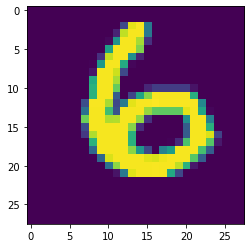

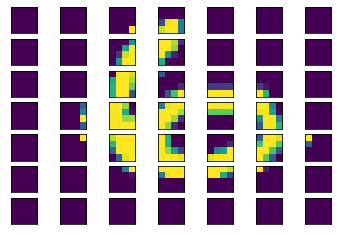

In [111]:
def patchify_images(X, n_patches):
    np1, np2 = n_patches
    b, c, h, w = X.shape
    out = rearrange(X, 'b c (np1 ps1) (np2 ps2) -> b c np1 np2 ps1 ps2', np1=np1, np2=np2)
    out = X.reshape(b, c, np1, h//np1, np2, w//np2).permute(0, 1, 2, 4, 3, 5)
#     print(out.shape)
    return out

def show_patches(X, patches):
    plt.imshow(X[0].detach().cpu().numpy())
    plt.show()
    c, h, w, _, _ = patches.shape
    
    for i in range(h):
        for j in range(w):
            plt.subplot(h, w, j+i*h+1)
            plt.imshow(patches[0, i, j].detach().cpu().numpy())
            plt.xticks([]);plt.yticks([]);
    
    

temp = patchify_images(X, (7, 7,))

show_patches(X[0], temp[0])


In [7]:
# class MLPMixerX2(nn.Module):
#     """
#     Maps (bs, dim1*dim2) to (bs, dim1*dim2)
#     """
#     def __init__(self, dim1a, dim1b, dim2a, dim2b, num_repeats, num_repeats2):
#         super().__init__()
        
#         self.dim1, self.dim2 = dim1a*dim1b, dim2a*dim2b
#         self.flip1s = nn.ModuleList([MLPMixer(dim1a, dim1b, num_repeats2) for _ in range(num_repeats)])
#         self.flip2s = nn.ModuleList([MLPMixer(dim2a, dim2b, num_repeats2) for _ in range(num_repeats)])
        
#     def forward(self, x):
#         shape = x.shape
#         x = x.reshape(-1, self.dim2, self.dim1)
#         for f1, f2 in zip(self.flip1s, self.flip2s):
#             x = torch.relu(f1(x))
#             x = x.transpose(-1, -2)
#             x = torch.relu(f2(x))
#             x = x.transpose(-1, -2)
#         return x.reshape(shape)
    
# class MLPMixer(nn.Module):
#     """
#     Maps (bs, dim1*dim2) to (bs, dim1*dim2)
#     """
#     def __init__(self, dim1, dim2, num_repeats):
#         super().__init__()
        
#         self.dim1, self.dim2 = dim1, dim2
#         self.flip1s = nn.ModuleList([nn.Linear(dim1, dim1) for _ in range(num_repeats)])
#         self.flip2s = nn.ModuleList([nn.Linear(dim2, dim2) for _ in range(num_repeats)])
        
#     def forward(self, x):
#         shape = x.shape
#         x = x.reshape(-1, self.dim2, self.dim1)
#         for f1, f2 in zip(self.flip1s, self.flip2s):
#             x = torch.relu(f1(x))
#             x = x.transpose(-1, -2)
#             x = torch.relu(f2(x))
#             x = x.transpose(-1, -2)
#         return x.reshape(shape)

class LinearMNIST(nn.Module):
    def __init__(self, prev_layer, dim_in):
        super().__init__()
        self.prev_layer = prev_layer
        self.lin = nn.Linear(dim_in, 10)
        
        for p in self.lin.parameters():
            p.requires_grad_(False)
    def forward(self, x):
        x = self.prev_layer(x)
        x = x.reshape(len(x), -1)
        x = self.lin(x)
        return x.log_softmax(dim=-1)
    
# net = LinearMNIST(MLPMixerX2(7,4, 7, 4, 1, 1), 28*28)
# print(np.sum([p.numel() for p in net.parameters()]))
# net = LinearMNIST(MLPMixer(28, 28, 1), 28*28)
# print(np.sum([p.numel() for p in net.parameters()]))
# net = LinearMNIST(nn.Identity(), 28*28)
# print(np.sum([p.numel() for p in net.parameters()]))
        
# net(torch.randn(3, 1, 28, 28)).shape

In [8]:
class MLPMixer(nn.Module):
    """
    Maps (bs, N) to (bs, N)
    where N = dims[0]*dims[1]
    """
    def __init__(self, dims, num_repeats):
        super().__init__()
        
        self.dims1, self.dims2 = dims
        
        self.dims1prod = np.prod(flatten_list(self.dims1))
        self.dims2prod = np.prod(flatten_list(self.dims2))
        
        self.num_repeats = num_repeats[0]
        self.num_repeats_child = num_repeats[1:]
        
        if type(self.dims1) is list:
            self.flip1s = nn.ModuleList([MLPMixer(self.dims1, self.num_repeats_child) for _ in range(self.num_repeats)])
            self.flip2s = nn.ModuleList([MLPMixer(self.dims2, self.num_repeats_child) for _ in range(self.num_repeats)])
        else:
            self.flip1s = nn.ModuleList([nn.Linear(self.dims1prod, self.dims1prod) for _ in range(self.num_repeats)])
            self.flip2s = nn.ModuleList([nn.Linear(self.dims2prod, self.dims2prod) for _ in range(self.num_repeats)])
            
        
    def forward(self, x):
        shape = x.shape
        x = x.reshape(-1, self.dims2prod, self.dims1prod)
        for f1, f2 in zip(self.flip1s, self.flip2s):
            x = torch.relu(f1(x))
            x = x.transpose(-1, -2)
            x = torch.relu(f2(x))
            x = x.transpose(-1, -2)
        return x.reshape(shape)
    
linear_params = np.sum([p.numel() for p in LinearMNIST(nn.Identity(), 16*16).parameters()])

# net = LinearMNIST(MLPMixer([28,28], [1]), 28*28)
# print(np.sum([p.numel() for p in net.parameters()])-7850)
# net(torch.randn(3, 1, 28, 28)).shape

# net = LinearMNIST(MLPMixer([[7,4], [2,14]], [1, 1]), 28*28)
# print(np.sum([p.numel() for p in net.parameters()])-7850)
# net(torch.randn(3, 1, 28, 28)).shape

# net = LinearMNIST(MLPMixer([[[1,7], [2,2]], [[2,1],[2,7]]], [1, 1, 1]), 28*28)
# print(np.sum([p.numel() for p in net.parameters()])-7850)
# net(torch.randn(3, 1, 28, 28)).shape

net = LinearMNIST(MLPMixer([16,16], [4]), 16*16)
print(np.sum([p.numel() for p in net.parameters()])-linear_params)
net(torch.randn(3, 1, 16, 16)).shape

net = LinearMNIST(MLPMixer([[4, 4],[4, 4]], [2, 2]), 16*16)
print(np.sum([p.numel() for p in net.parameters()])-linear_params)
net(torch.randn(3, 1, 16, 16)).shape

net = LinearMNIST(MLPMixer([[[2,2], [2,2]], [[2,2],[2,2]]], [2, 2, 4]), 16*16)
print(np.sum([p.numel() for p in net.parameters()])-linear_params)
net(torch.randn(3, 1, 16, 16)).shape

2176
320
768


torch.Size([3, 10])

In [109]:
print(X_batch.shape)
rearrange(patchify_images(X_batch, (4,4)), 'b c np1 np2 ps1 ps2 -> b c (np1 np2) (ps1 ps2)').shape
# print().reshape()

torch.Size([5000, 1, 28, 28])
torch.Size([5000, 1, 4, 4, 7, 7])


torch.Size([5000, 1, 16, 49])

In [84]:
# net = LinearMNIST(MLPMixer([[[7,1],[2,2]],[[1,7],[2,2]]], [1,1,1]), 28*28)
# net = LinearMNIST(MLPMixer([[7,4],[7,4]], [2, 2]), 28*28)
net = LinearMNIST(MLPMixer([28,28], [1]), 28*28)
# net = LinearMNIST(nn.Identity(), 28*28)
print(np.sum([p.numel() for p in net.parameters()])-7850)
net = net.to(device)
opt = torch.optim.Adam(net.parameters(), lr=1e-2)

bs = 5000

data = []
data.append(task.calc_pheo_fitness(net, None, device, 'test'))
loop = tqdm(range(300))
for epoch_idx in loop:
    train_loader = zip(task.X_train.reshape(-1, bs, 1, 28, 28), 
                       task.Y_train.reshape(-1, bs))
    for X_batch, Y_batch in train_loader:
#         X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        Y_batch_pred = net(X_batch)
        loss = task.loss_func(Y_batch_pred, Y_batch)
        opt.zero_grad()
        loss.backward()
        opt.step()
    fit = task.calc_pheo_fitness(net, None, device, 'test')
    data.append(fit)
    loop.set_postfix(fit)
data = util.arr_dict2dict_arr(np.array(data))


1624


In [97]:
net = LinearMNIST(MLPMixer([[7,4],[7,4]], [2, 2]), 28*28)
print(np.sum([p.numel() for p in net.parameters()])-7850)
net = LinearMNIST(MLPMixer([28,28], [1]), 28*28)
print(np.sum([p.numel() for p in net.parameters()])-7850)

608
1624


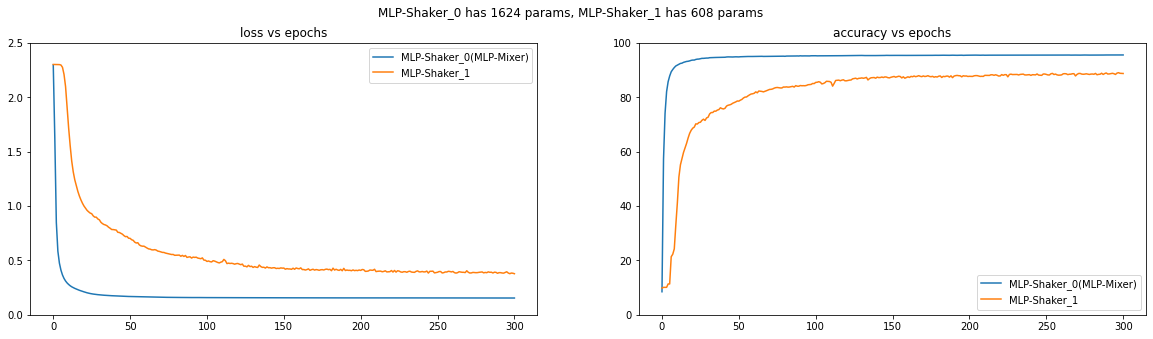

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(data_0['loss'], label='MLP-Shaker_0(MLP-Mixer)')
plt.plot(data_1['loss'], label='MLP-Shaker_1')
plt.ylim(0, 2.5)
plt.legend()
plt.title('loss vs epochs')
plt.subplot(122)
plt.plot(data_0['accuracy'], label='MLP-Shaker_0(MLP-Mixer)')
plt.plot(data_1['accuracy'], label='MLP-Shaker_1')
plt.ylim(0, 100)
plt.legend()
plt.title('accuracy vs epochs')
plt.suptitle('MLP-Shaker_0 has 1624 params, MLP-Shaker_1 has 608 params')
plt.show()

In [89]:
h, w = 256, 256
bs_train, bs_test = 200, 400

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    torchvision.transforms.Resize((h, w), ), 
])
ds_train = torchvision.datasets.CIFAR10('~/datasets/cifar10/', train=True, download=True, transform=transform)
ds_test = torchvision.datasets.CIFAR10('~/datasets/cifar10/', train=False, download=True, transform=transform)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size=bs_train, shuffle=True,)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size=bs_test, shuffle=True,)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Files already downloaded and verified
Files already downloaded and verified


In [20]:
import einops

In [21]:
X_batch, Y_batch = next(iter(dl_train))

In [22]:
X_batch.shape, Y_batch.shape

(torch.Size([20, 3, 256, 256]), torch.Size([20]))

In [32]:
X_batch_patch = einops.rearrange(X_batch, 'b c (np1 ps1) (np2 ps2) -> b np1 np2 ps1 ps2 c', np1=16, np2=16)

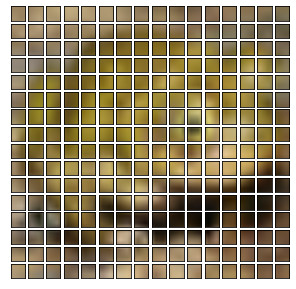

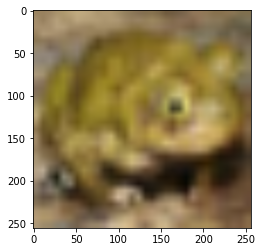

frog


In [107]:
def show_picture(X_batch, X_batch_patch, Y_batch, i=0):
    plt.figure(figsize=(5,5))
    for pi1 in range(16):
        for pi2 in range(16):
            plt.subplot(16, 16, pi1*16+pi2+1)
            plt.imshow(X_batch_patch[i, pi1, pi2].numpy())
            plt.xticks([]);plt.yticks([])
    plt.show()
    plt.imshow(X_batch[i].permute(1, 2, 0).numpy())
    plt.show()
    print(labels[Y_batch[i]])
    
show_picture(X_batch, X_batch_patch, Y_batch, 7)

In [82]:
import einops, einops.layers.torch

In [85]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(*[
            nn.Conv2d(3, 4, 3),
            nn.MaxPool2d(3, 3),
            nn.Conv2d(4, 8, 3),
            nn.MaxPool2d(3, 3),
            nn.Conv2d(8, 8, 3),
            nn.MaxPool2d(3, 3),
            nn.Conv2d(8, 10, 3),
            nn.MaxPool2d(6, 6),
            einops.layers.torch.Rearrange('b c h w -> b (c h w)'),
            nn.Linear(10, 10),
            nn.LogSoftmax(dim=-1),
        ])
    
    def forward(self, x):
        return self.seq(x)
    
    

In [93]:
t = torchvision.transforms.ToTensor()

In [95]:
import torchinfo

In [99]:
torchinfo.summary(net, [1000, 3, 256, 256])

Layer (type:depth-idx)                   Output Shape              Param #
ConvNet                                  --                        --
├─Sequential: 1-1                        [1000, 10]                --
│    └─Conv2d: 2-1                       [1000, 4, 254, 254]       112
│    └─MaxPool2d: 2-2                    [1000, 4, 84, 84]         --
│    └─Conv2d: 2-3                       [1000, 8, 82, 82]         296
│    └─MaxPool2d: 2-4                    [1000, 8, 27, 27]         --
│    └─Conv2d: 2-5                       [1000, 8, 25, 25]         584
│    └─MaxPool2d: 2-6                    [1000, 8, 8, 8]           --
│    └─Conv2d: 2-7                       [1000, 10, 6, 6]          730
│    └─MaxPool2d: 2-8                    [1000, 10, 1, 1]          --
│    └─Rearrange: 2-9                    [1000, 10]                --
│    └─Linear: 2-10                      [1000, 10]                110
│    └─LogSoftmax: 2-11                  [1000, 10]                --
Total para

In [100]:
import mlp_shaker_flat

In [104]:
m = mlp_shaker_flat.MLPFlatShaker(shape=[3, 256, 256], dims_to_mix=[1, 2, 1, 2, 1, 2, 1, 2], target_lengths=[128, 128, 64, 64, 32, 32, 16, 16])

summary(m, [10, 3, 256, 256])

Layer (type:depth-idx)                   Output Shape              Param #
MLPFlatShaker                            --                        --
├─ModuleList: 1                          --                        --
│    └─MLPFlatShakerBlock: 2-1           [10, 3, 128, 256]         32,896
│    └─MLPFlatShakerBlock: 2-2           [10, 3, 128, 128]         32,896
│    └─MLPFlatShakerBlock: 2-3           [10, 3, 64, 128]          8,256
│    └─MLPFlatShakerBlock: 2-4           [10, 3, 64, 64]           8,256
│    └─MLPFlatShakerBlock: 2-5           [10, 3, 32, 64]           2,080
│    └─MLPFlatShakerBlock: 2-6           [10, 3, 32, 32]           2,080
│    └─MLPFlatShakerBlock: 2-7           [10, 3, 16, 32]           528
│    └─MLPFlatShakerBlock: 2-8           [10, 3, 16, 16]           528
Total params: 87,520
Trainable params: 87,520
Non-trainable params: 0
Total mult-adds (M): 0.87
Input size (MB): 7.86
Forward/backward pass size (MB): 15.67
Params size (MB): 0.35
Estimated Total Size (M

In [90]:
loss_fn = nn.NLLLoss()
def train_model(net, dl):
    opt = torch.optim.Adam(net.parameters(), lr=1e-3, )
    
    for epoch_idx, (X_batch, Y_batch) in tqdm(enumerate(dl), total=len(dl), leave=False):
        Y_batch_pred = net(X_batch)
        
        loss = loss_fn(Y_batch_pred, Y_batch)
        
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    
    
net = ConvNet()
train_model(net, dl_train)
    
    

KeyboardInterrupt: 

In [ ]:
def perform_stats(self, net, dl=None, show_stats=True, n_batches=-1, tqdm=tqdm, device='cpu'):
        if loader is None:
            loader = self.loader_test
        n_correct, total = 0, 0
        loss_total = 0
        n_examples = 0
        loop = enumerate(loader)
        if tqdm is not None:
            loop = tqdm(loop, leave=False, total=max(n_batches, len(loader)))
        for batch_idx, (X_batch, Y_batch) in loop:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            if batch_idx == n_batches:
                break
            Y_batch_pred = net(X_batch)
            n_correct += (Y_batch_pred.argmax(dim=-1)==Y_batch).sum().item()
            loss = self.loss_func(Y_batch_pred, Y_batch).item()
            loss_total += loss * len(X_batch)
            n_examples += len(X_batch)
            total += len(Y_batch)
        loss_total /= n_examples
        accuracy = n_correct/total*100.
        if show_stats:
            print(f'Average Loss: {loss_total:.03f}, Accuracy: {accuracy:.03f}%')
        return {'loss': loss_total, 'accuracy': accuracy}

In [ ]:
self.to_patch_embedding = nn.Sequential(
    Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width),
#     nn.Linear(patch_dim, dim),
)


In [8]:
import models
import util

In [47]:
# net = models.MLPFlatShaker(shape=[3, 4, 4, 4, 4, 4, 4, 4, 4], dims_to_mix=list(np.arange(8))*100)
net = models.MLPFlatShaker(shape= [3]+[4]*8, dims_to_mix=list(np.arange(9))*10)

print(util.count_params(net))


for X_batch, Y_batch in tqdm(dl_train):
    Y_batch_pred = net(X_batch)

1720


torch.Size([20, 3, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
nn.LayerNorm()

In [340]:
shape = [3, 256, 256]
x = torch.randn(100, *shape)
m = MLPFlatShaker(shape=shape, dims_to_mix=[1, 2, 1, 2, 1, 2, 1, 2], target_lengths=[128, 128, 64, 64, 32, 32, 16, 16])
m(x).shape

count_params(m)

[3, 128, 256]
[3, 128, 128]
[3, 64, 128]
[3, 64, 64]
[3, 32, 64]
[3, 32, 32]
[3, 16, 32]
[3, 16, 16]


87520

In [ ]:
for X_batch, Y_batch in dl_train:
    m(X_batch)
#     print(X_batch.shape)

In [206]:

# with contextlib.redirect_stdout(None):
net = MLPShakerBlock([[32, 8], [16, [4,2,2]]], [3, 2, 3])
#     net = MLPShakerBlock([256, 256], [3])
print('# parameters: ', count_params(net))
net(torch.randn(10, 256*256)).shape

Decomposing (depth=3) [[32, 8], [16, [4, 2, 2]]] -> [256, 256]
with repeats=[3, 2, 3]
----> 3x 
	Decomposing (depth=2) [32, 8] -> [32, 8]
	with repeats=[2, 3]
	----> 2x 
	Putting Linear size 32
	Putting Linear size 8
	<----
	Decomposing (depth=2) [16, [4, 2, 2]] -> [16, 16]
	with repeats=[2, 3]
	----> 2x 
	Putting Linear size 16
		Decomposing (depth=1) [4, 2, 2] -> [4, 2, 2]
		with repeats=[3]
		----> 3x 
		Putting Linear size 4
		Putting Linear size 2
		Putting Linear size 2
		<----
	<----
<----
# parameters:  8976
torch.Size([10, 65536]) --> torch.Size([10, 256, 256])
torch.Size([10, 256, 256]) --> torch.Size([2560, 32, 8])
Densely mixing with 32
Densely mixing with 8
Densely mixing with 32
Densely mixing with 8
torch.Size([10, 256, 256]) <-- torch.Size([2560, 32, 8])
torch.Size([10, 256, 256]) --> torch.Size([2560, 16, 16])
Densely mixing with 16
torch.Size([2560, 16, 16]) --> torch.Size([40960, 4, 2, 2])
Densely mixing with 4
Densely mixing with 2
Densely mixing with 2
Densely mixi

torch.Size([10, 65536])

In [205]:
((4*5+2*3+2*3)*3+16*17+8*9+32*33)*2*3

8976

In [139]:
list(net.modules())

[MLPShakerBlock(
   (mixings): ModuleList(
     (0): ModuleList(
       (0): MLPShakerBlock(
         (mixings): ModuleList(
           (0): ModuleList(
             (0): Linear(in_features=16, out_features=16, bias=True)
             (1): MLPShakerBlock(
               (mixings): ModuleList(
                 (0): ModuleList(
                   (0): Linear(in_features=4, out_features=4, bias=True)
                   (1): Linear(in_features=4, out_features=4, bias=True)
                 )
                 (1): ModuleList(
                   (0): Linear(in_features=4, out_features=4, bias=True)
                   (1): Linear(in_features=4, out_features=4, bias=True)
                 )
                 (2): ModuleList(
                   (0): Linear(in_features=4, out_features=4, bias=True)
                   (1): Linear(in_features=4, out_features=4, bias=True)
                 )
               )
             )
           )
           (1): ModuleList(
             (0): Linear(in_features

In [108]:
import contextlib

    

NameError: name 'do_thing' is not defined